<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Rodrigues Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# KNN: K Nearst Neighbours

## Detecção de Anomalias: Métodos baseados em distância

De modo geral, os métodos baseados em distância definem inicialmente uma distância entre cada ponto e sua vizinhança. O método então procede definindo como anomalia pontos com as maiores distâncias com relação a vizinhança.

<b>Exemplo:</b> Laço Aninhado Simples (Simple Nested Loop)
* Encontra os k vizinhos mais próximos (k nearest neighbors)
* Calcula a distância média
* Define anomalia como sendo os n pontos com a maior distância média

In [ ]:
!gdown --id 1OQpN4HuGnnQGoxyTzgUbMPPXrWkMXheu

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OQpN4HuGnnQGoxyTzgUbMPPXrWkMXheu
To: /content/AnmlDet.csv
100% 11.0k/11.0k [00:00<00:00, 7.95MB/s]


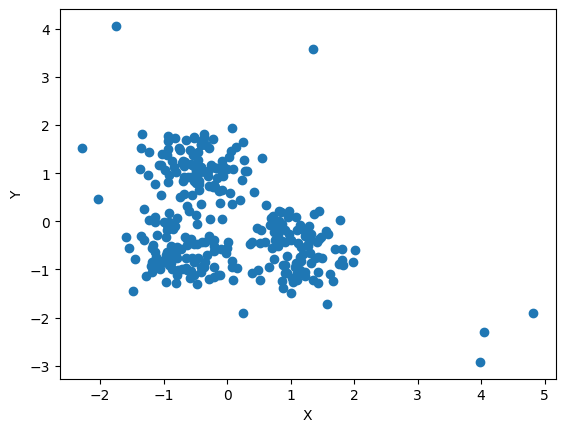

In [ ]:
import numpy as np
from csv import reader
import matplotlib.pyplot as plt

with open('AnmlDet.csv', 'r') as f:
    csvlist = list(reader(f))

X=list()
Y=list()
for l in csvlist:
    X.append(float(l[0]))
    Y.append(float(l[1]))

# print(X[0:10])
# print(Y[0:10])

#Padronização: --------------------------------------------

X=np.array(X)
X=X-X.mean()
X=X/X.std()

Y=np.array(Y)
Y=Y-Y.mean()
Y=Y/Y.std() # padronização
#Y=Y/(Y.max()-Y.min()) # normalização

# gera a figura -------------------------------------------
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X,Y,'o')
plt.show()

(1.9478568111901542, 1.806897370728216, 1.6642618004897145, 1.4996652022062729, 1.3144466569868338, 0.791506504220619, 0.6932876945743758, 0.6248107020567492, 0.4223540411973358, 0.40893210124119095)
(43, 47, 226, 293, 258, 184, 297, 91, 217, 180)


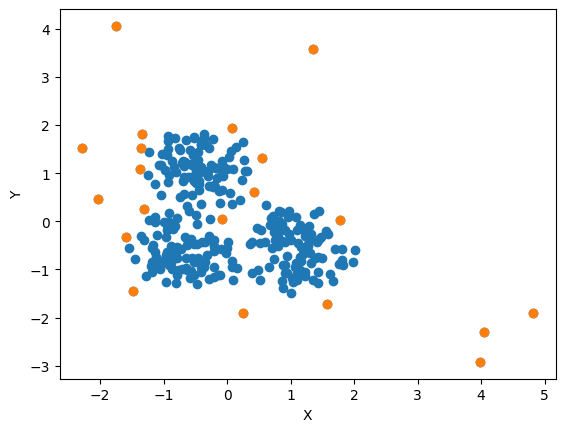

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

k=6
n=20

# agrupa os dados --------------------------
XY=list()
for i in range(len(X)):
    XY.append([X[i],Y[i]])

#print(XY[:10])

#identifica a vizinhança ------------------
ngb=NearestNeighbors(n_neighbors=5)
ngb.fit(XY)

dist,idx = ngb.kneighbors(XY)
# print(dist[:10])
# print(idx[:10])

dist,lbl = zip(*sorted(zip(dist.mean(axis=1), range(0,len(dist))),reverse=True))

print(dist[:10])
print(lbl[:10])

anml_X=list()
anml_Y=list()
for i in lbl[:n]:
    anml_X.append(X[i])
    anml_Y.append(Y[i])

plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X,Y,'o')
plt.plot(anml_X,anml_Y,'o')
plt.show()

In [ ]:
# dist,idx = ngb.kneighbors(XY)

print(idx[:10])

[[  0  97 190  24   6]
 [  1  35  38  76  87]
 [  2  62  40  44 118]
 [  3  78  94  12  86]
 [  4  49  37  93  89]
 [  5  31  77  58  89]
 [  6  97 190  66  17]
 [  7  82  75  69  54]
 [  8  27  76  33  39]
 [  9  69  54  39  36]]


In [ ]:
print(dist[:10])


[[0.         0.14253041 0.21990692 0.27159227 0.32392529]
 [0.         0.10989655 0.11725446 0.2785705  0.2998007 ]
 [0.         0.12729353 0.16625216 0.18475924 0.22550039]
 [0.         0.10371389 0.12655653 0.1294334  0.1789889 ]
 [0.         0.10704998 0.13031971 0.17980479 0.18556257]
 [0.         0.08362886 0.11427994 0.15001362 0.19578708]
 [0.         0.19580358 0.25410897 0.26143785 0.28025945]
 [0.         0.18643451 0.20402125 0.27433141 0.28318754]
 [0.         0.07419112 0.13619762 0.20365426 0.22200217]
 [0.         0.02453796 0.12378591 0.19227031 0.20827974]]


### Distribuição de distâncias

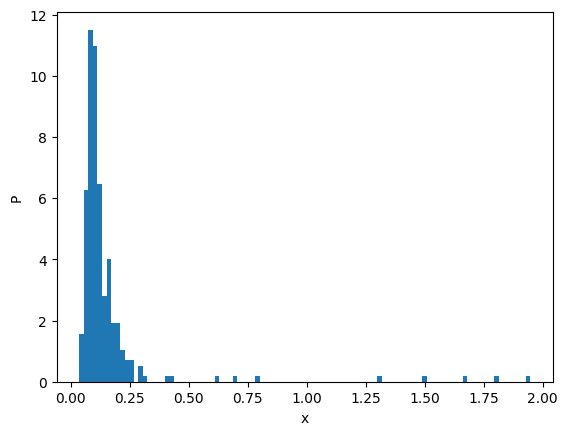

(1.9478568111901542, 1.806897370728216, 1.6642618004897145, 1.4996652022062729, 1.3144466569868338, 0.791506504220619, 0.6932876945743758, 0.6248107020567492, 0.4223540411973358, 0.40893210124119095, 0.31918324531496595, 0.3039709307702146, 0.29914894216814875, 0.2903538907170857, 0.2585696550844533, 0.25353910191874707, 0.24765978659136625, 0.24731045763485043, 0.24495448249654891, 0.24086300190150936)


In [ ]:
plt.ylabel('P')
plt.xlabel('x')

N,bins,patches=plt.hist(dist,bins='fd',density=True)
plt.show()

print(dist[:n])

10


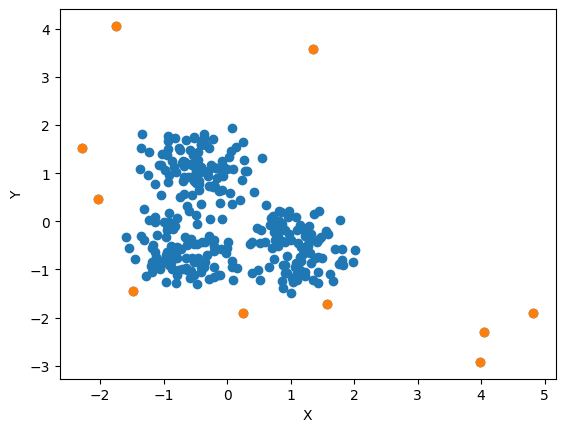

In [ ]:
anml_X=list()
anml_Y=list()
for i in range(len(X)):
    if(dist[i]>0.4):
        anml_X.append(X[lbl[i]])
        anml_Y.append(Y[lbl[i]])

print(len(anml_Y))

plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X,Y,'o')
plt.plot(anml_X,anml_Y,'o')
plt.show()

# Aprendizado Supervisionado: (Classificação)

## Leitura dos dados: (Iris dataset)

In [ ]:
!pip install gdown
!gdown --id 1HGQ3ka5Im4m1DeaNMgAFqZv2li1YF7Xd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HGQ3ka5Im4m1DeaNMgAFqZv2li1YF7Xd
To: /content/iris.csv
100% 3.86k/3.86k [00:00<00:00, 14.1MB/s]


In [ ]:
import pandas as pd

iris = pd.read_csv('iris.csv')
# iris

## Divisão dos dados:

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

features = ['sepal_length','sepal_width','petal_length','petal_width']

X = np.array(iris[features])
Y = np.array(iris['species'])

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=5487)

## Treinamento

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

hipotese = KNeighborsClassifier(n_neighbors=3)
hipotese.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

## Teste

In [ ]:
Y_pred = hipotese.predict(X_test)

print(Y_test[:10])
print(Y_pred[:10])

['virginica' 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'setosa']
['virginica' 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'setosa']


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.86      0.92        14
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



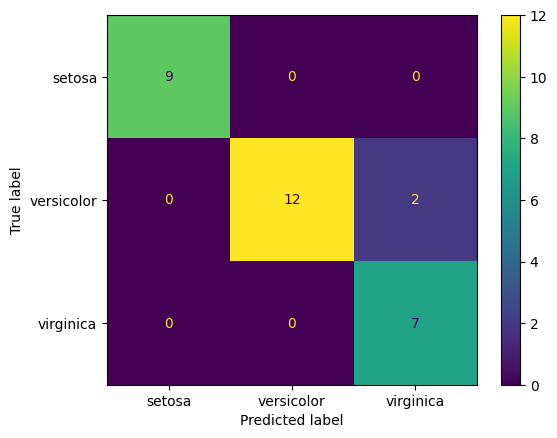

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(Y_test,Y_pred))

plt = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_pred),display_labels=hipotese.classes_)
plt.plot()